In [90]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from keras.models import Sequential
from keras.layers import Dense

import pickle
import matplotlib.pyplot as plt

In [72]:
dataset = pd.read_csv("data.csv")
# dataset = dataset.values
dataset.shape

dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes


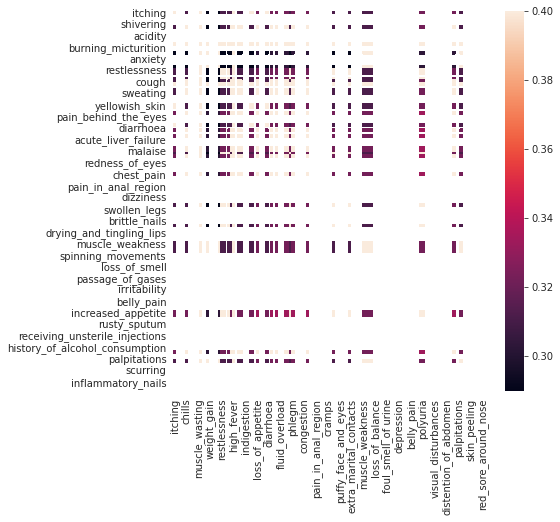

In [93]:
#checking the relationship between the variables by applying the correlation 
# corr = dataset.corr()
# mask = np.array(corr)
# mask[np.tril_indices_from(mask)] = False
# plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
# sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
corrmat = dataset.corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat.abs(), vmax=.4, square=False)

In [73]:
x, y = dataset.iloc[:,:-1], dataset.iloc[:, -1].to_frame()

# Splitting train and set dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [74]:
labelencoder = LabelEncoder()

y_train["prognosis"] = labelencoder.fit_transform(y_train["prognosis"])
y_test["prognosis"] = labelencoder.transform(y_test["prognosis"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
onehotencoder = OneHotEncoder() 

y_train = onehotencoder.fit_transform(y_train["prognosis"].values.reshape(-1,1)).toarray()
y_test = onehotencoder.transform(y_test["prognosis"].values.reshape(-1,1)).toarray()


In [76]:
# Initalizing layers of ANN
classifier = Sequential()

# Adding input and hidden layer
classifier.add(Dense(units = 6, activation = 'relu' , input_dim = 132))

# Adding second hiddent layer
classifier.add(Dense(units = 6, activation = 'relu' ))

# Adding Output layer
classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [77]:
# Fitting the Tr
classifier.fit(x_train, y_train, batch_size = 10, epochs = 45)

Epoch 1/45
39/39 [==============================] - 0s 1ms/step - loss: 1.4029 - accuracy: 0.1522
Epoch 2/45
39/39 [==============================] - 0s 961us/step - loss: 1.3209 - accuracy: 0.5584
Epoch 3/45
39/39 [==============================] - 0s 1ms/step - loss: 1.1918 - accuracy: 0.6902
Epoch 4/45
39/39 [==============================] - 0s 1ms/step - loss: 1.0360 - accuracy: 0.7166
Epoch 5/45
39/39 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.7520
Epoch 6/45
39/39 [==============================] - 0s 1ms/step - loss: 0.7990 - accuracy: 0.7863
Epoch 7/45
39/39 [==============================] - 0s 1ms/step - loss: 0.7360 - accuracy: 0.7420
Epoch 8/45
39/39 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7662
Epoch 9/45
39/39 [==============================] - 0s 987us/step - loss: 0.6276 - accuracy: 0.7490
Epoch 10/45
39/39 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7293
Epoch 11/45
39/

In [78]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [79]:
r2_score(y_test, y_pred)

1.0

In [80]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        22

   micro avg       1.00      1.00      1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96
 samples avg       1.00      1.00      1.00        96



In [81]:
classifier.save("classifier.hdf5")

with open('labelencoder', 'wb') as f:
    pickle.dump(labelencoder, f)
    
with open('onehotencoder', 'wb') as f:
    pickle.dump(onehotencoder, f)